<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n250.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.542891,29.934507,49.654470,-75.179191,46.952677,70.414737,-23.462060
1,0.0,1.0,82.224857,48.559157,80.896407,101.620525,323.300946,287.198035,36.102911
2,0.0,2.0,67.725358,78.271160,34.909391,-1126.148825,-935.242916,136.091008,-1071.333924
3,0.0,3.0,79.038642,78.064057,26.033883,33.032681,226.169263,0.687153,225.482110
4,0.0,4.0,95.720550,70.696693,83.282181,-416.222880,-156.523455,415.439634,-571.963089
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.304594,24.405283,86.056684,249.576091,425.342652,286.639977,138.702676
249996,999.0,246.0,56.821240,48.490018,92.790658,-284.774265,-76.672349,275.931510,-352.603859
249997,999.0,247.0,25.950022,68.440496,31.296980,-386.621504,-250.934006,285.749445,-536.683450
249998,999.0,248.0,28.915398,87.775819,41.020470,2677.757426,2845.469113,277.747842,2567.721271


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.542891,29.934507,49.654470,-75.179191,46.952677,70.414737,-23.462060
1,0.0,1.0,82.224857,48.559157,80.896407,101.620525,323.300946,287.198035,36.102911
2,0.0,2.0,67.725358,78.271160,34.909391,-1126.148825,-935.242916,136.091008,-1071.333924
3,0.0,3.0,79.038642,78.064057,26.033883,33.032681,226.169263,0.687153,225.482110
4,0.0,4.0,95.720550,70.696693,83.282181,-416.222880,-156.523455,415.439634,-571.963089
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.304594,24.405283,86.056684,249.576091,425.342652,286.639977,138.702676
249996,999.0,246.0,56.821240,48.490018,92.790658,-284.774265,-76.672349,275.931510,-352.603859
249997,999.0,247.0,25.950022,68.440496,31.296980,-386.621504,-250.934006,285.749445,-536.683450
249998,999.0,248.0,28.915398,87.775819,41.020470,2677.757426,2845.469113,277.747842,2567.721271


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    32.542891  29.934507  ...   70.414737   -23.462060
      1.0    82.224857  48.559157  ...  287.198035    36.102911
      2.0    67.725358  78.271160  ...  136.091008 -1071.333924
      3.0    79.038642  78.064057  ...    0.687153   225.482110
      4.0    95.720550  70.696693  ...  415.439634  -571.963089
...                ...        ...  ...         ...          ...
999.0 245.0  55.304594  24.405283  ...  286.639977   138.702676
      246.0  56.821240  48.490018  ...  275.931510  -352.603859
      247.0  25.950022  68.440496  ...  285.749445  -536.683450
      248.0  28.915398  87.775819  ...  277.747842  2567.721271
      249.0  41.376869  44.669172  ...  269.304656   470.326644

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    32.542891  29.934507  ...   70.414737   -23.462060
      1.0    82.224857  48.559157  ...  287.198035    36.102911
      2.0    67.725358  78.271160  ...  136.091008 -1071.333924
      3.0    79.038642  78.064057  ...    0.687153   225.482110
      4.0    95.720550  70.696693  ...  415.439634  -571.963089
...                ...        ...  ...         ...          ...
999.0 245.0  55.304594  24.405283  ...  286.639977   138.702676
      246.0  56.821240  48.490018  ...  275.931510  -352.603859
      247.0  25.950022  68.440496  ...  285.749445  -536.683450
      248.0  28.915398  87.775819  ...  277.747842  2567.721271
      249.0  41.376869  44.669172  ...  269.304656   470.326644

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.542891,29.934507,49.654470,-75.179191,46.952677,70.414737,-23.462060
1,0.0,1.0,82.224857,48.559157,80.896407,101.620525,323.300946,287.198035,36.102911
2,0.0,2.0,67.725358,78.271160,34.909391,-1126.148825,-935.242916,136.091008,-1071.333924
3,0.0,3.0,79.038642,78.064057,26.033883,33.032681,226.169263,0.687153,225.482110
4,0.0,4.0,95.720550,70.696693,83.282181,-416.222880,-156.523455,415.439634,-571.963089
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.304594,24.405283,86.056684,249.576091,425.342652,286.639977,138.702676
249996,999.0,246.0,56.821240,48.490018,92.790658,-284.774265,-76.672349,275.931510,-352.603859
249997,999.0,247.0,25.950022,68.440496,31.296980,-386.621504,-250.934006,285.749445,-536.683450
249998,999.0,248.0,28.915398,87.775819,41.020470,2677.757426,2845.469113,277.747842,2567.721271


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    32.542891  29.934507  ...   70.414737   -23.462060
      1.0    82.224857  48.559157  ...  287.198035    36.102911
      2.0    67.725358  78.271160  ...  136.091008 -1071.333924
      3.0    79.038642  78.064057  ...    0.687153   225.482110
      4.0    95.720550  70.696693  ...  415.439634  -571.963089
...                ...        ...  ...         ...          ...
999.0 245.0  55.304594  24.405283  ...  286.639977   138.702676
      246.0  56.821240  48.490018  ...  275.931510  -352.603859
      247.0  25.950022  68.440496  ...  285.749445  -536.683450
      248.0  28.915398  87.775819  ...  277.747842  2567.721271
      249.0  41.376869  44.669172  ...  269.304656   470.326644

[250000 rows x 7 columns]

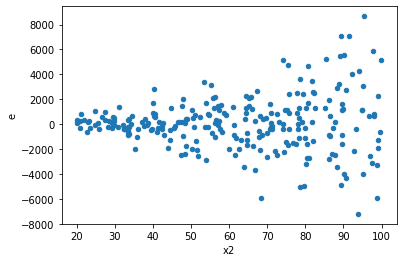

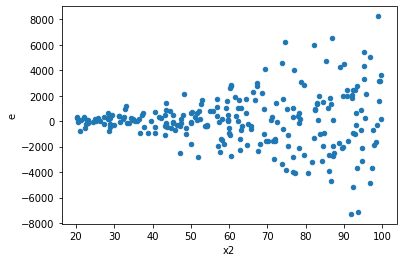

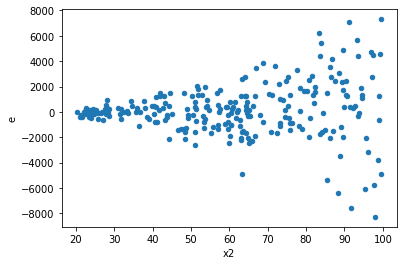

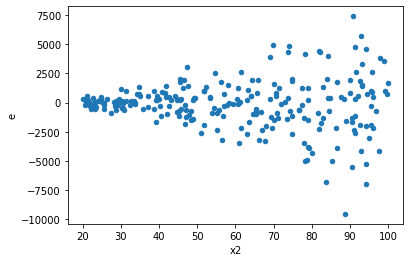

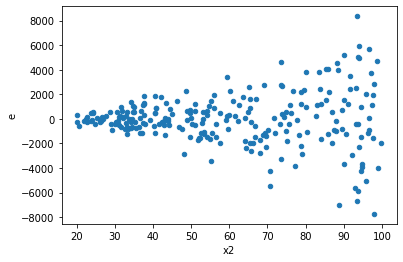

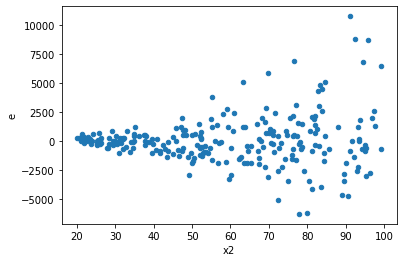

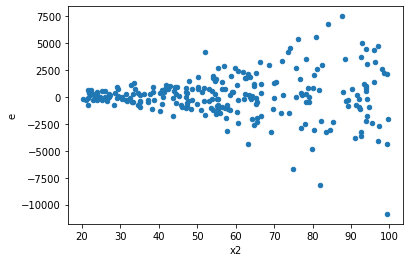

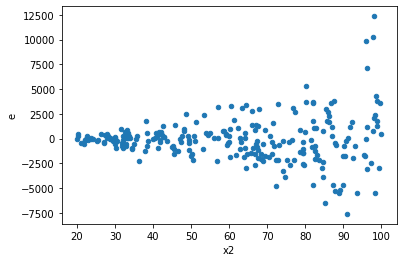

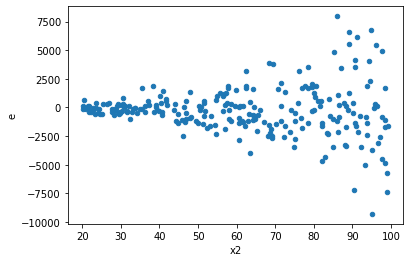

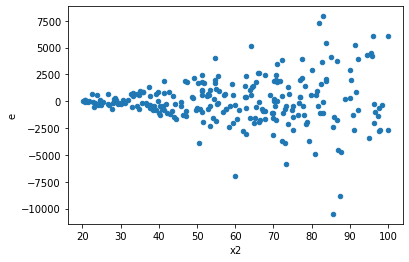

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,117159973.82845087,869774632.7138628,1207834.781736607,8966748.790864564,7.4238206470361,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,51553609.634779796,863908913.7991872,531480.5116987608,8906277.46184729,16.75748642858104,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,70315043.40480132,889770512.1907262,724897.3546886734,9172891.878254909,12.654056217648158,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,57628306.14163173,869085967.0622542,594106.2488828014,8959649.144971693,15.080886898294773,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,54967169.136085264,951128796.4455279,566671.8467637656,9805451.50974771,17.30357978033698,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,49377676.558924295,913854323.8196996,509048.2119476731,9421178.596079377,18.507438735582504,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,42544799.3864231,882922867.1350243,438606.1792414753,9102297.599330148,20.752780125149272,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,62028443.70031596,1087402503.6652334,639468.4917558347,11210335.089332303,17.530707507654174,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,43923922.34479174,943077373.2461599,452823.9416988839,9722447.146867627,21.470700313219748,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,117159973.82845087,869774632.7138628,1207834.781736607,8966748.790864564,7.4238206470361,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,51553609.634779796,863908913.7991872,531480.5116987608,8906277.46184729,16.75748642858104,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,70315043.40480132,889770512.1907262,724897.3546886734,9172891.878254909,12.654056217648158,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,57628306.14163173,869085967.0622542,594106.2488828014,8959649.144971693,15.080886898294773,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,54967169.136085264,951128796.4455279,566671.8467637656,9805451.50974771,17.30357978033698,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,49377676.558924295,913854323.8196996,509048.2119476731,9421178.596079377,18.507438735582504,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,42544799.3864231,882922867.1350243,438606.1792414753,9102297.599330148,20.752780125149272,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,62028443.70031596,1087402503.6652334,639468.4917558347,11210335.089332303,17.530707507654174,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,43923922.34479174,943077373.2461599,452823.9416988839,9722447.146867627,21.470700313219748,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64